In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split  # aaron said 80 20
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')


df = pd.read_csv("ObesityDataSet.csv")


X = df.drop(columns=['obese_category'])  # 'obesity_level' is target variable
y = df['obese_category']
print(X.head())
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#check shape of data
print(X_train.shape[0])
print(X_train.shape[1])



   Gender  Age  Height  Weight family_history_with_overweight  \
0  Female   21    1.62      64                            yes   
1  Female   21    1.52      56                            yes   
2    Male   23    1.80      77                            yes   
3    Male   27    1.80      87                             no   
4    Male   22    1.78      90                             no   

  eat_high_caloric_food  eat_vegetables_frequency  main_meals_day  \
0                    no                         2               3   
1                    no                         3               3   
2                    no                         2               3   
3                    no                         3               3   
4                    no                         2               1   

  eat_between_meals smoke  water_day monitor_calories  exercise_frequency  \
0         Sometimes    no          2               no                   0   
1         Sometimes   yes          3    

In [92]:
#Only for numerical ones, not categroical
# Assuming X_train is your DataFrame
summary_stats = X_train.describe()
print(summary_stats)



,Age,Height,Weight,eat_vegetables_frequency,main_meals_day,water_day,exercise_frequency,device_time
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.449052,1.701564,86.601896,2.423578,2.687204,2.011256,0.997630,0.655213
std,6.486209,0.093323,26.098537,0.588439,0.813652,0.683789,0.884561,0.668246
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,66.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700000,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.770000,107.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [142]:
import seaborn as sns

def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'black'
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['font.family'] = 'Montserrat'
    plt.rcParams['text.color'] = 'white'
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = df[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors = ["#4b0548", "#d668f4", "#c136ff", "#a826db", "#9614b5", "#810090", "#6b0066"]
    
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    centre_circle = plt.Circle((0, 0), 0.6, fc='black')
    ax[0].add_artist(centre_circle)
    
    sns.countplot(data=df, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 5, i, str(v), color='white', fontsize=10, ha='left', va='center')  # Adjusted text position    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9, color='white')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold', x=0.44)  # Center the title
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()




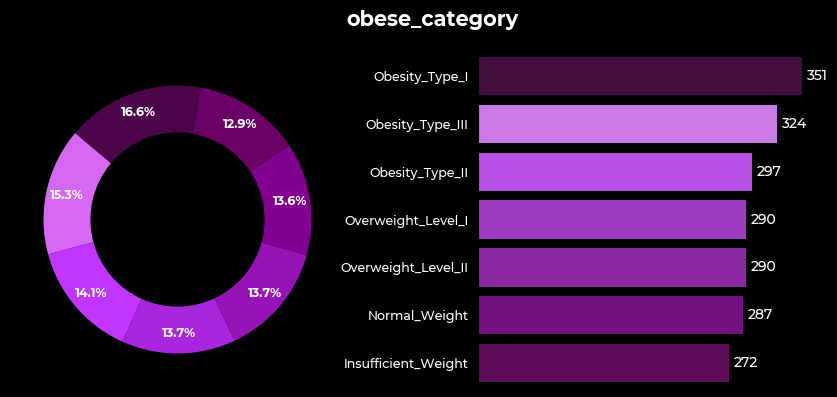

Largest segment is Obesity_Type_I with a share of 16.6%


In [143]:
showplot('obese_category')
print('Largest segment is Obesity_Type_I with a share of 16.6%')

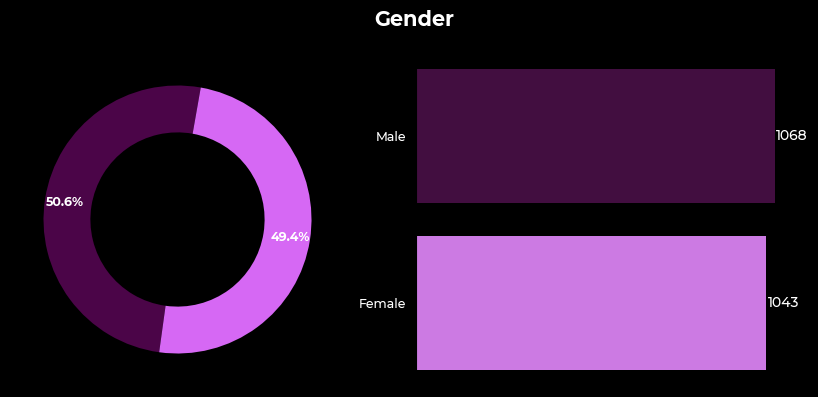

Gender distribution is fairly equal in the dataset


In [145]:
showplot('Gender')
print('Gender distribution is fairly equal in the dataset')

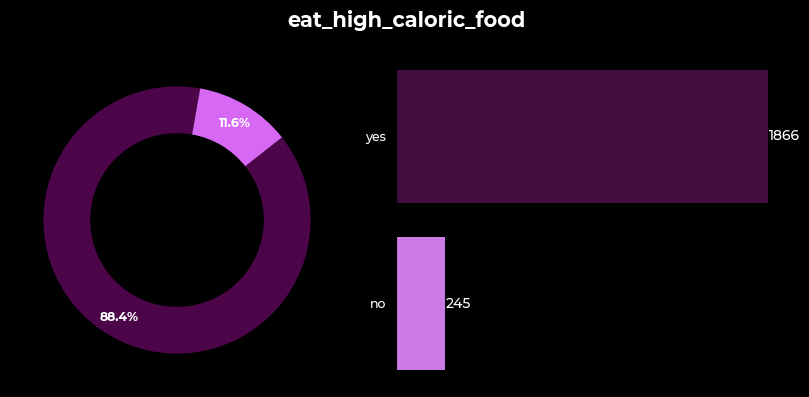

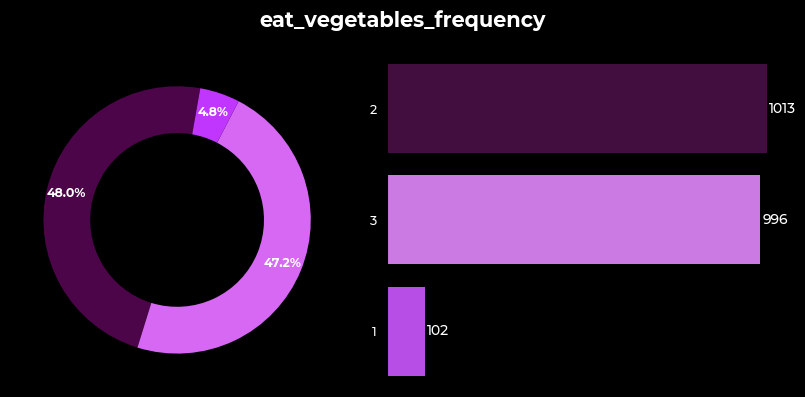

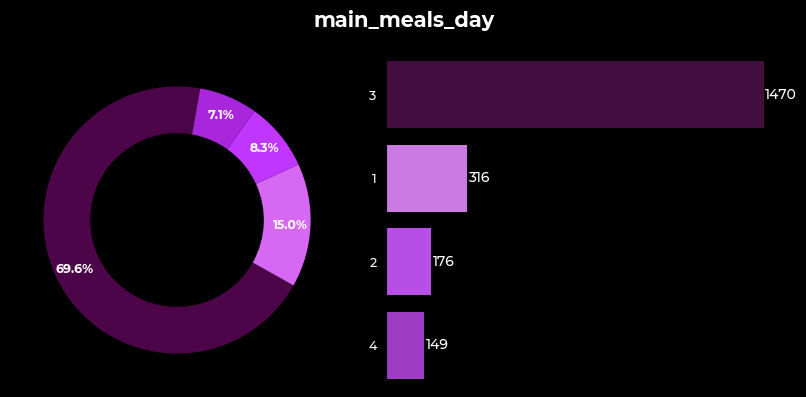

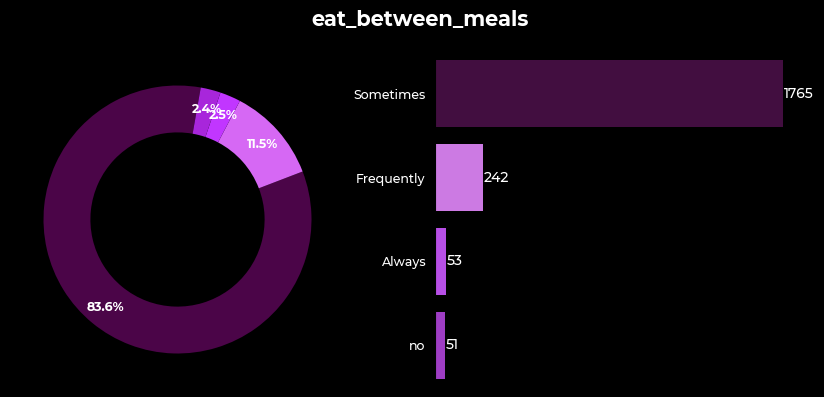

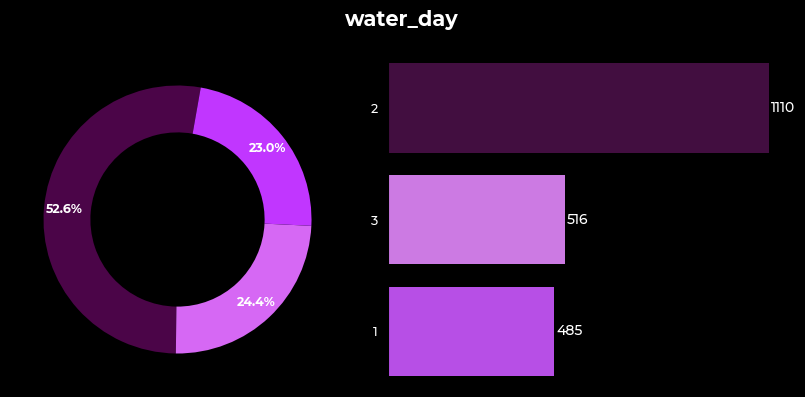

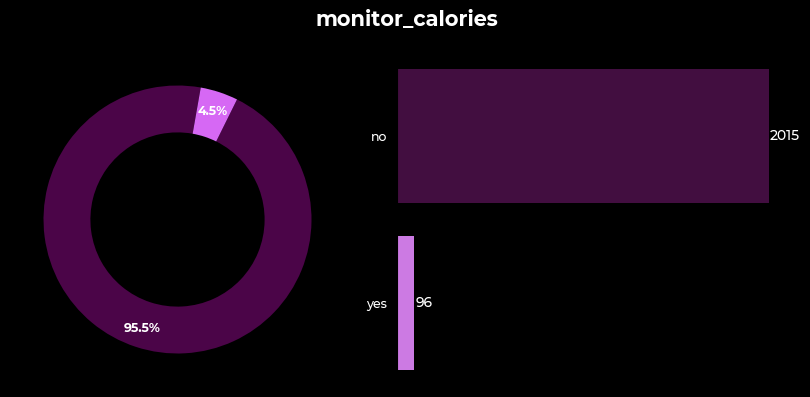

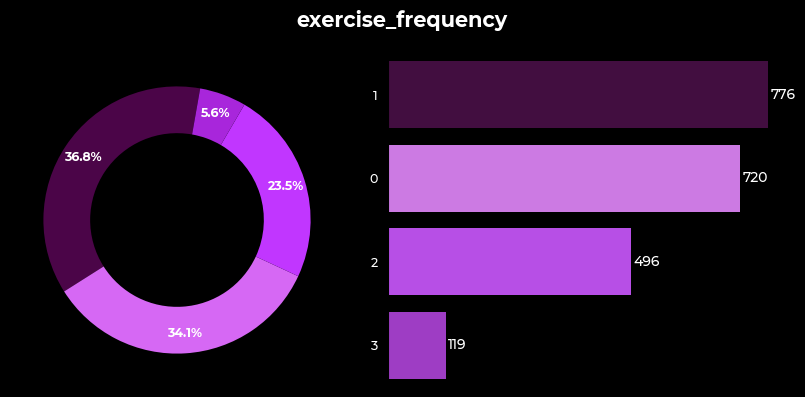

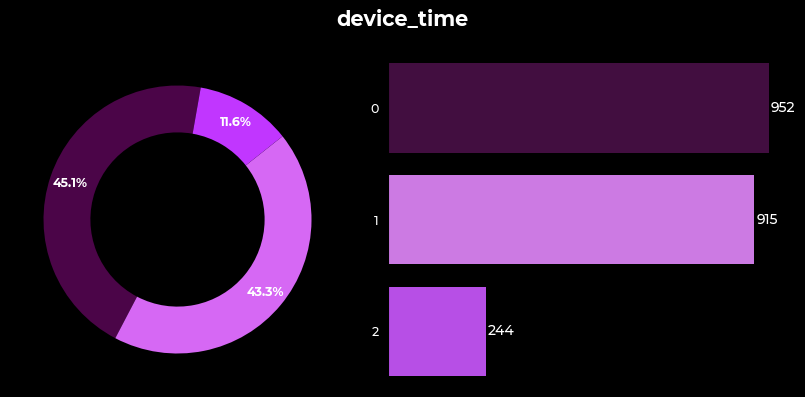

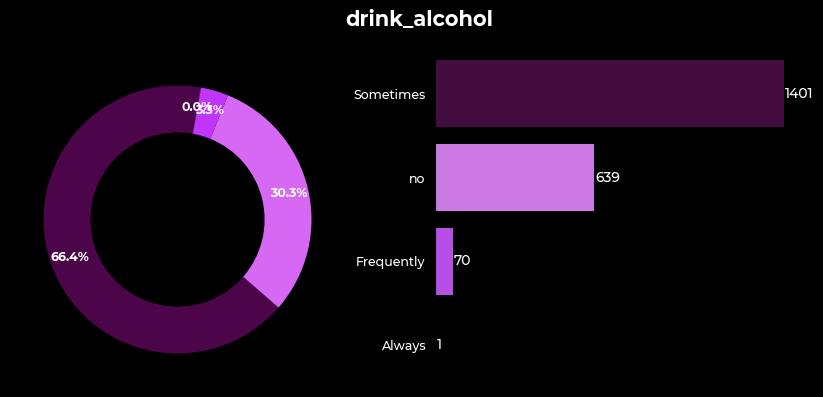

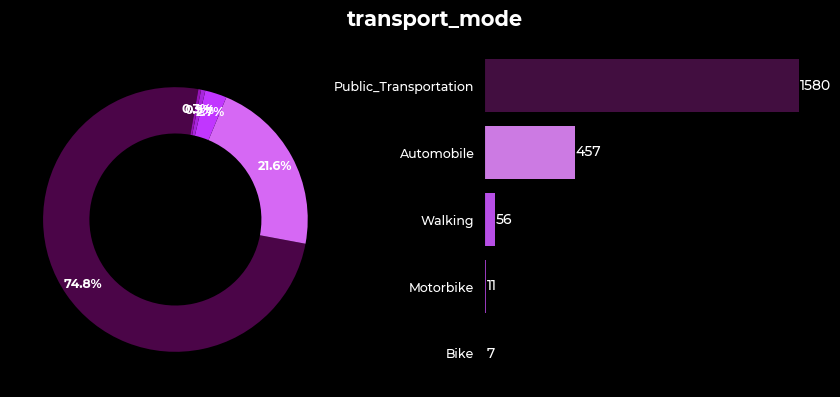

In [150]:
columns = ['eat_high_caloric_food', 'eat_vegetables_frequency', 'main_meals_day',
       'eat_between_meals', 'water_day', 'monitor_calories',
       'exercise_frequency', 'device_time', 'drink_alcohol', 'transport_mode']

for col in columns:
    showplot(col)
